In [1]:
# changing working directory
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
import yfinance as yf

In [3]:
df = yf.download('MSFT',periods='max')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061252,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063439,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.064533,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.062892,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.061799,47894400


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9100.000000,9100.000000,9100.000000,9100.000000,9100.000000,9.100000e+03
mean,41.807768,42.248142,41.354810,41.817271,36.734035,5.869281e+07
std,60.678750,61.262302,60.047048,60.691260,60.997743,3.843989e+07
min,0.088542,0.092014,0.088542,0.090278,0.056877,2.304000e+06
25%,4.287110,4.340821,4.244141,4.305664,2.712649,3.454098e+07
50%,26.840000,27.110001,26.540001,26.850000,18.951409,5.197685e+07
75%,40.252500,40.651564,39.665000,40.060156,29.295881,7.257555e+07
max,344.619995,349.670013,342.200012,343.109985,342.402008,1.031789e+09


In [5]:
df.index

DatetimeIndex(['1986-03-13', '1986-03-14', '1986-03-17', '1986-03-18',
               '1986-03-19', '1986-03-20', '1986-03-21', '1986-03-24',
               '1986-03-25', '1986-03-26',
               ...
               '2022-04-05', '2022-04-06', '2022-04-07', '2022-04-08',
               '2022-04-11', '2022-04-12', '2022-04-13', '2022-04-14',
               '2022-04-18', '2022-04-19'],
              dtype='datetime64[ns]', name='Date', length=9100, freq=None)

In [14]:
# Data Cleaning
df = df.dropna() 
# Take a slice
df_2010 = df.Close['2010-01-01':'2022-03-30']
df_2020 = df.Close['2020-01-01':'2022-03-30']
df_2010.head()

Date
2010-01-04    30.950001
2010-01-05    30.959999
2010-01-06    30.770000
2010-01-07    30.450001
2010-01-08    30.660000
Name: Close, dtype: float64

In [10]:
# Data Exploration need graphing and pandas
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

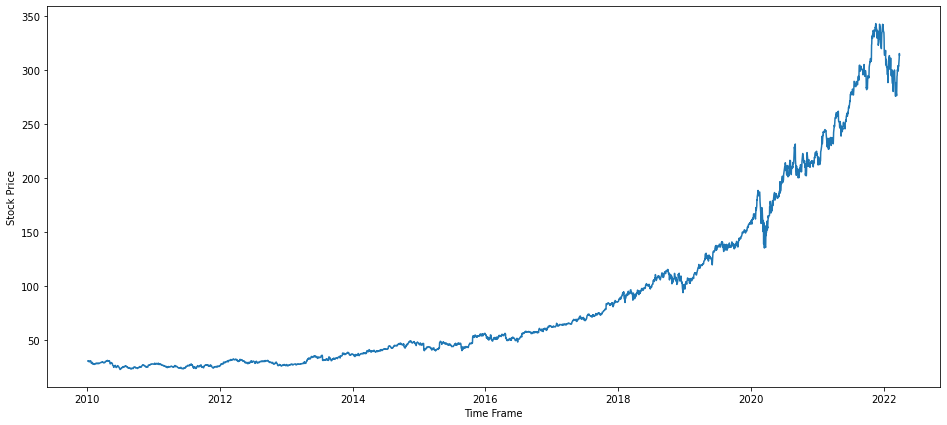

In [9]:
# Data Exploration
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Stock Price')
ax1.plot(df_2010)

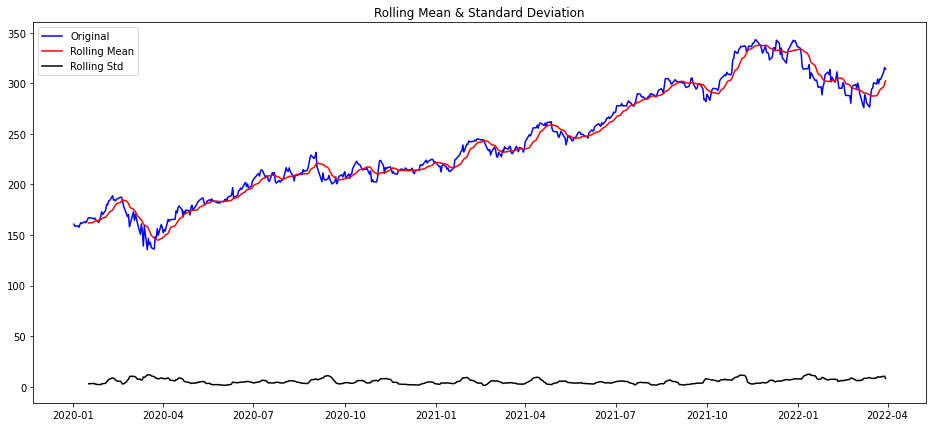

In [15]:
# check stationarity
# method 1 = rolling statistics
rollmean = df_2020.rolling(12).mean()
rollstd = df_2020.rolling(12).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

# plot rolling statistics
orig = plt.plot(df_2020, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


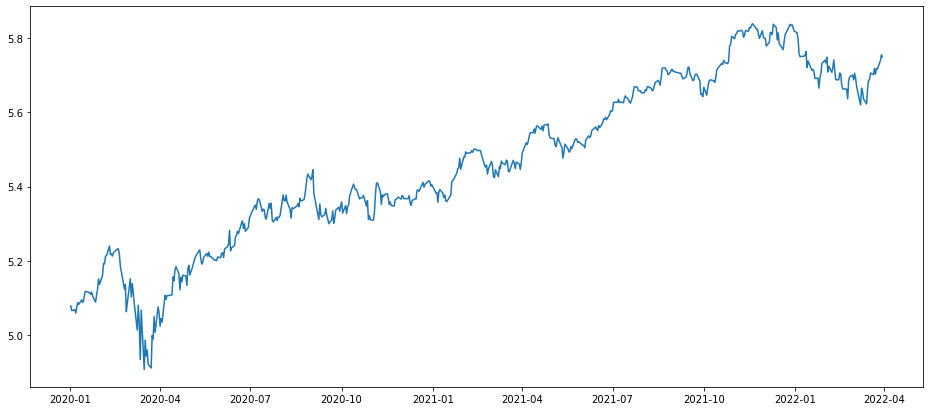

In [16]:
# try to make stationary with log transformation
plt.figure(figsize=(16,7))
fig = plt.figure(1)

# lots of methods to attempt stationarity, need to try lots
import numpy as np
ts_log = np.log(df_2020)
plt.plot(ts_log)

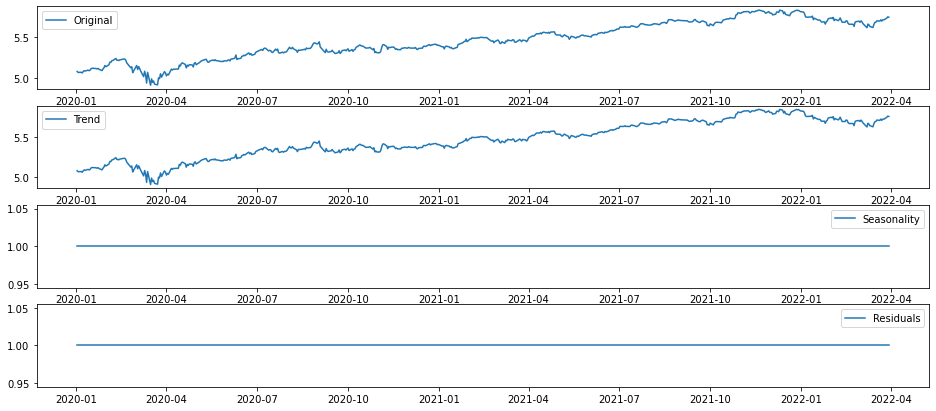

In [17]:
# Decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log, freq=1, model='multiplicative')

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(16,7))
fig = plt.figure(1)

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')


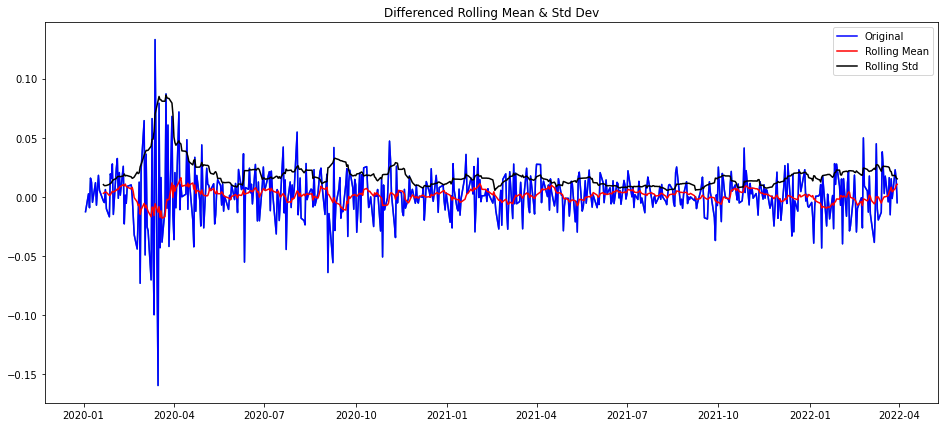

In [19]:
# Differencing
plt.figure(figsize=(16,7))
fig = plt.figure(1)
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

# Determining rolling statistics
rollmean = ts_log_diff.rolling(12).mean()
rollstd = ts_log_diff.rolling(12).std()

# Plot rolling statistics
orig = plt.plot(ts_log_diff, color='blue', label='Original')
mean = plt.plot(rollmean, color='red', label='Rolling Mean')
std = plt.plot(rollstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Differenced Rolling Mean & Std Dev')
plt.show(block=False)

In [20]:
df_2020.sort_index(inplace=True)

In [21]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20)

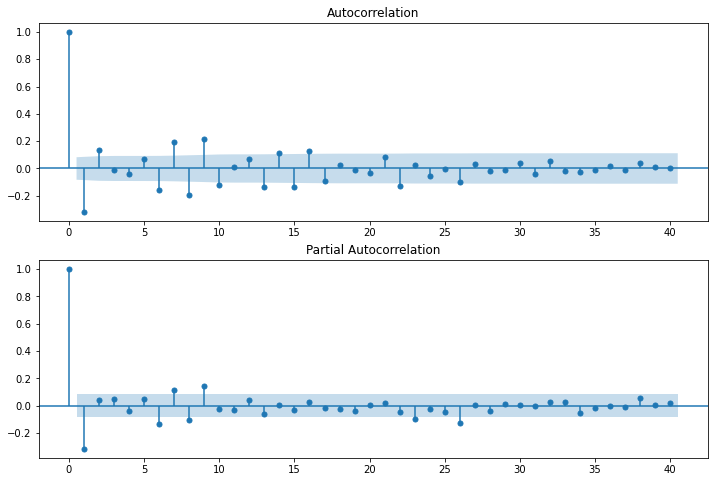

In [22]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(ts_log_diff.dropna(), lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(ts_log_diff.dropna(), lags=40,ax=ax2)

In [23]:
from statsmodels.tsa.arima_model import ARIMA

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


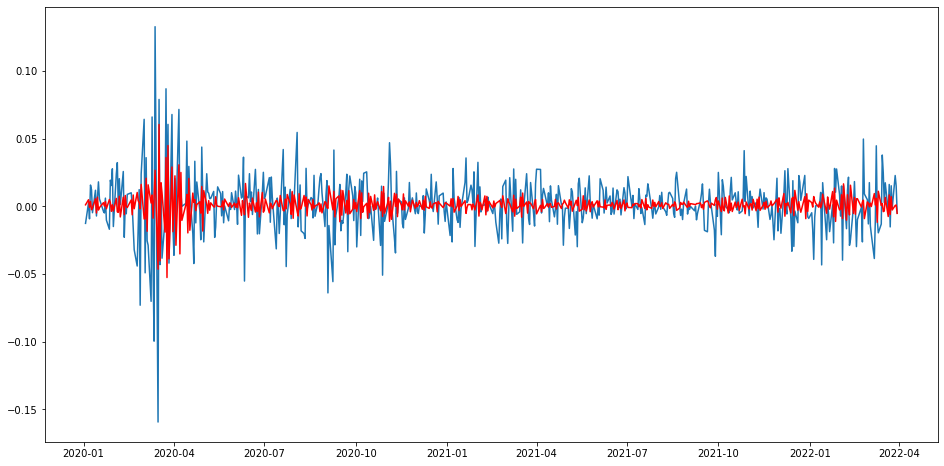

In [24]:
plt.figure(figsize=(16,8))
model = ARIMA(ts_log, order=(2,1,2))
results_ARIMA = model.fit(disp=1)
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')

In [26]:
ARIMA_diff_predictions = pd.Series(results_ARIMA.fittedvalues, copy=True)
print(ARIMA_diff_predictions.head())

Date
2020-01-03    0.001197
2020-01-06    0.004950
2020-01-07   -0.000618
2020-01-08    0.003732
2020-01-09   -0.002462
dtype: float64


In [28]:
ARIMA_diff_predictions_cumsum = ARIMA_diff_predictions.cumsum()

ARIMA_log_prediction = pd.Series(ts_log.iloc[0], index=ts_log.index)
ARIMA_log_prediction = ARIMA_log_prediction.add(ARIMA_diff_predictions_cumsum,fill_value=0)
ARIMA_log_prediction.head()

Date
2020-01-02    5.079041
2020-01-03    5.080238
2020-01-06    5.085188
2020-01-07    5.084570
2020-01-08    5.088302
dtype: float64

Text(0.5, 1.0, 'Microsoft ARIMA forecast')

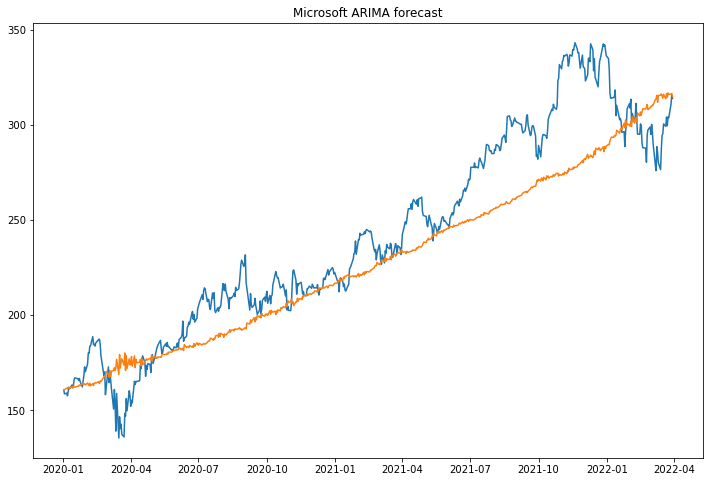

In [31]:
plt.figure(figsize=(12,8))
predictions_ARIMA = np.exp(ARIMA_log_prediction)
plt.plot(df_2020)
plt.plot(predictions_ARIMA)
plt.title('Microsoft ARIMA forecast')